# HOMEWORK 2. Naive Bayes.

*Sofiia Schipinskaia*

In [6]:
# importing the needed libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate

## 1. Loading and looking through the data

In [2]:
# importing the file
df = pd.read_csv('SMSSpamCollection.csv', sep = '\t', header = -1, quoting = 3, names = ['label', 'sms'])
# printing out first 5 columns
df.head(5)

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# looking through the data
df.groupby('label').describe()

sms                                                               
      count unique                                                top freq
label                                                                     
ham    4827   4518                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [4]:
# constructing the graph
df['length'] = df['sms'].apply(len)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000229FDBDD4A8>,
      dtype=object)

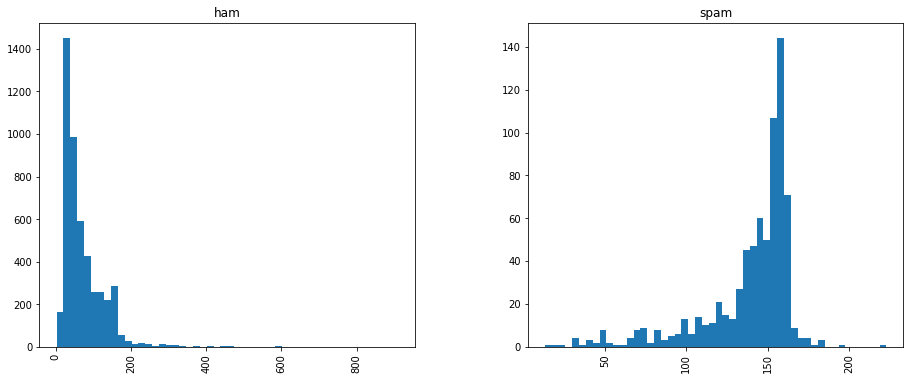

In [7]:
# constructing the graph
df.hist(column='length', by='label', bins=50, figsize=(15,6))

### Comment
From the above information we can conclude, that:
- the dataset contains around 13.4% of spam messages and 86,5% of ham messages
- there are some duplications of the messages (the number of 'count' is not equal to the number of 'unique')
- the spam messages are shorter than the ham ones
- the distribution of the length of *ham* messages is right-skewed, and their length is less than 200 in most cases
- the distribution of the length of *spam* messages is left-skewed, and their length is between 120 and 160 in most cases

## 2. Preparing the data

In [8]:
# data encoding
df['label'] = df['label'].map({'ham':0, 'spam':1})
df = df.iloc[:, :-1]
df.head(5)

,label,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# vectorizing
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['sms'])
features = vectorizer.get_feature_names()
values = X.toarray()
data = pd.DataFrame(data = values, columns = features)
data['label'] = df['label']
data.head(5)

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data['label'], test_size=0.33, random_state=42)

## 3. Naive Bayes using sklearn

In [11]:
# applying naive_bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [12]:
# checking the performance
print(classification_report(clf.predict(X_test), y_test))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1578
          1       0.96      0.93      0.94       262

avg / total       0.98      0.98      0.98      1840



In [13]:
# cross-validation for Logistic Regression
scores_f1 = cross_validate(clf, X_train, y_train, cv=5, scoring=('f1'))

In [14]:
# F1 results 
print('F1 scores: ', scores_f1['test_score'])

F1 scores:  [0.89320388 0.94845361 0.91666667 0.90721649 0.94358974]


### Comment
1. For performance checking the metrix of f1-score has been chosen
2. The naive bayes model predicts both classes very well
3. The total f1-score of the model is 98%

## 4. My Naive Bayes

Using Bayes' theorem, the conditional probability can be decomposed as:
$$p(Ck|x) = (p(Ck)*p(x|Ck))/p(x)$$

In [15]:
# extracting class for spam
spam = X_train[y_train==1]

In [16]:
# extracting class for ham
ham = X_train[y_train==0]

In [17]:
# checking the shapes
data.shape[0]==X_test.shape[0]+ham.shape[0]+spam.shape[0]

True

In [18]:
# defining the function for p(Ck)
def p_Ck(X_train, spam, ham):
    p_ham = ham.iloc[:,:-1].sum().sum()/X_train.iloc[:,:-1].sum().sum()
    p_spam = spam.iloc[:,:-1].sum().sum()/X_train.iloc[:,:-1].sum().sum()
    return  p_ham, p_spam

In [19]:
# cheking how the function works
p_ham, p_spam = p_Ck(X_train, spam, ham)

In [20]:
# cheking the probability for ham and spam
print('The probability for ham is:', p_ham)
print('The probability for spam is:', p_spam)

The probability for ham is: 0.7875173114209214
The probability for spam is: 0.21248268857907857


In [21]:
# defining the function for p(x|Ck)
def p_x_Ck(spam, ham, a):
    p_x_ham = (a + ham.iloc[:,:-1].sum())/(a*(ham.sum().sum()+spam.sum().sum())+ham.iloc[:,:-1].sum().sum())
    p_x_spam = (a + spam.iloc[:,:-1].sum())/(a*(ham.sum().sum()+spam.sum().sum())+spam.iloc[:,:-1].sum().sum())
    return  p_x_ham, p_x_spam

In [22]:
# cheking how the function works
p_x_ham, p_x_spam = p_x_Ck(spam, ham, 0.001)

In [23]:
# cheking the probability for ham and spam
print('The probability for ham is:', p_x_ham.iloc[3:8].product())
print('The probability for spam is:', p_x_spam.product())

The probability for ham is: 7.042891308805823e-39
The probability for spam is: 0.0


In [24]:
# defining the function for both
def fit(X_train, y_train):
    p_ham, p_spam = p_Ck(X_train, spam, ham)
    p_x_ham, p_x_spam = p_x_Ck(spam, ham, 0.001)
    return p_ham, p_spam, p_x_ham, p_x_spam

In [25]:
# checking how the function works
p_ham, p_spam, p_x_ham, p_x_spam = fit(X_train, y_train)

In [26]:
# defining the fucntion for prediction
def predict(p_x_ham, p_x_spam, test, p_ham, p_spam):
    prob=[]
    if p_x_ham[test>0].product()*p_ham>p_x_spam[test>0].product()*p_spam:
        prob=[1,0]
    else:
        prob=[0,1]
    return prob

In [27]:
def final(mass):
    pred=[]
    for i in range(0, mass.shape[0]):
        pred.append(predict(p_x_ham, p_x_spam, mass.iloc[i,:], p_ham, p_spam))
    return np.array(pred)

In [28]:
# checking how the function works
final(X_test.iloc[1:15,:-1])

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0]])

In [29]:
print(classification_report(final(X_test.iloc[:,:-1]).argmax(axis=1),y_test))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99      1574
          1       0.95      0.91      0.93       266

avg / total       0.98      0.98      0.98      1840



### Comment
1. For performance checking the metrix of f1-score has been chosen
2. The naive bayes model predicts both classes very well
3. The total f1-score of the model is 98%
4. This result coincised with the f1-score of the sklearn naive_bayes
5. this means that the naive bayes made 'by hands' works as good as sklearn naive_bayes